In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
walmart = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/processed/walmart_locations.csv')

In [28]:
zips = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/processed/zip_code_classifications.csv')

In [29]:
walmart.head()

,State,City,Address,Designation,Store #,Open Date
0,Alabama,Adamsville,2473 Hackworth Rd.,Walmart Supercenter,1158,"March 1, 1988"
1,Alabama,Alabaster,9085 Hwy 119,Neighborhood Market,4756,"September 30, 2015"
2,Alabama,Alabaster,630 Colonial Promenade Pkwy,Walmart Supercenter,423,"December 1, 1981"
3,Alabama,Alexander City,2643 Highway 280,Walmart Supercenter,726,"August 4, 1981"
4,Alabama,Andalusia,1991 M L King Jr Expy,Walmart Supercenter,1091,"October 1, 1987"


In [30]:
zips.head()

,zip,ruca,city,state_name,population,county,median_household_income
0,1001,Urban,Agawam,Massachusetts,"16,088",Hampden,"$72,444"
1,1002,Urban,Amherst,Massachusetts,"27,323",Hampshire,"$65,013"
2,1003,Urban,Amherst,Massachusetts,"13,711",Hampshire,NaN
3,1005,Suburban,Barre,Massachusetts,"4,947",Worcester,"$103,477"
4,1007,Urban,Belchertown,Massachusetts,"15,304",Hampshire,"$101,076"


In [31]:
# Aggregate Walmart Data by State
walmart_store_counts = walmart.groupby('State')['Store #'].count().reset_index()
walmart_store_counts.rename(columns={'Store #': 'Walmart Store Count'}, inplace=True)

# Ensure 'population' column is in string format
zips['population'] = zips['population'].astype(str)

# Now replace commas and convert to numeric, handling NaN
zips['population'] = pd.to_numeric(
    zips['population'].str.replace(',', ''), errors='coerce')

# Proceed with the previous steps (aggregation and calculation)
# Aggregate Zip Code Data by State
state_population = zips.groupby('state_name')['population'].sum().reset_index()
state_population.rename(columns={'state_name': 'State', 'population': 'Total State Population'}, inplace=True)

# Merge and Calculate Average People per Walmart Store
merged_data = pd.merge(walmart_store_counts, state_population, on='State')
merged_data['Average People per Walmart Store'] = merged_data['Total State Population'] / merged_data['Walmart Store Count']

merged_data.head()  # Displaying the first few rows of the merged dataset

,State,Walmart Store Count,Total State Population,Average People per Walmart Store
0,Alabama,131,4997651,38150.007634
1,Alaska,9,735549,81727.666667
2,Arizona,112,7081046,63223.625000
3,Arkansas,118,3006627,25479.889831
4,California,278,39454173,141921.485612


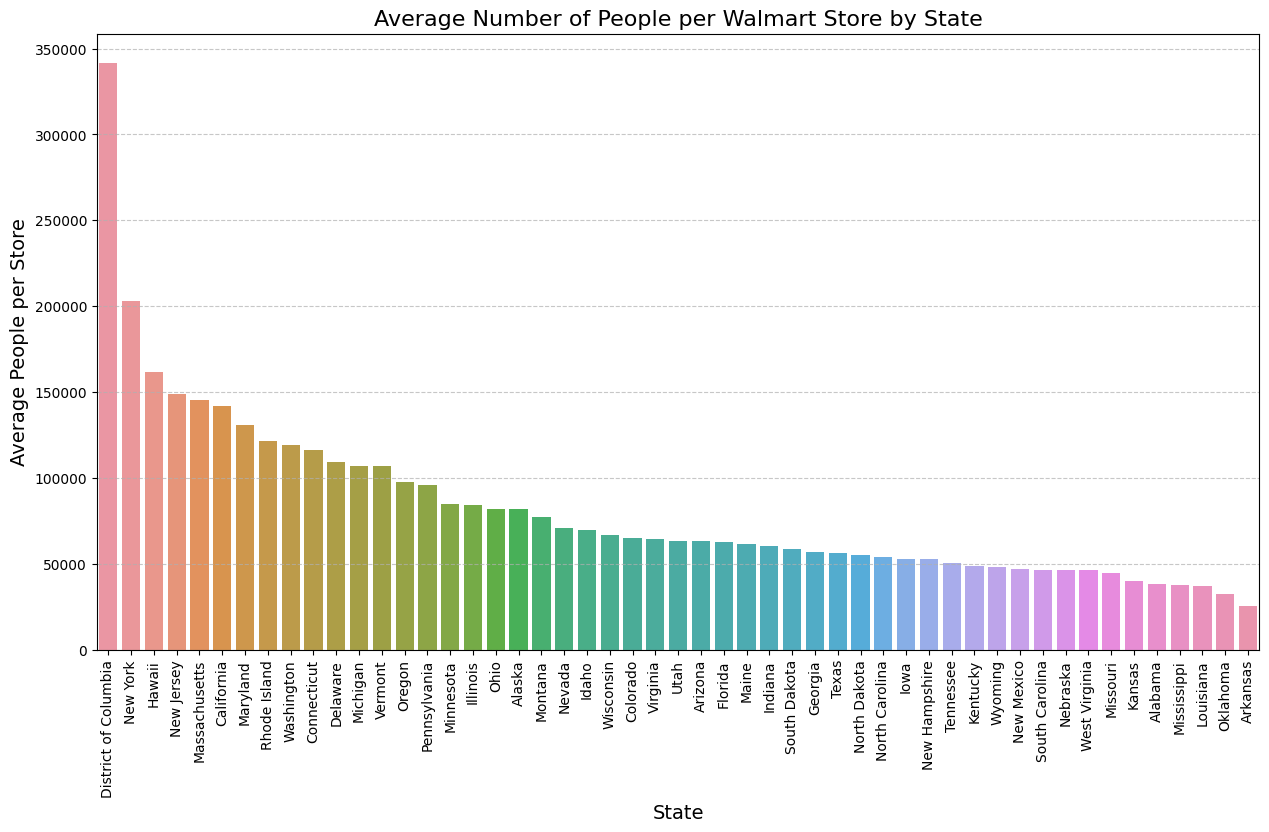

In [32]:
sorted_data = merged_data.sort_values('Average People per Walmart Store', ascending=False)

plt.figure(figsize=(15, 8))
plot = sns.barplot(x='State', y='Average People per Walmart Store', data=sorted_data)

plt.title('Average Number of People per Walmart Store by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average People per Store', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotating and setting small font for x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [33]:
# Converting 'Open Date' to datetime format
walmart['Open Date'] = pd.to_datetime(walmart['Open Date'], errors='coerce')

# Dropping rows where Open Date could not be converted (if any)
walmart = walmart.dropna(subset=['Open Date'])

# Creating a distribution of Open Dates
open_date_distribution = walmart['Open Date'].dt.year.value_counts().sort_index()

open_date_distribution

Open Date
1962      1
1964      1
1965      1
1967      2
1968      5
1969      5
1970      5
1971     15
1972     17
1973     19
1974     24
1975     19
1976     26
1977     38
1978     32
1979     42
1980     52
1981    148
1982     60
1983     84
1984     96
1985    108
1986    115
1987    138
1988    120
1989    131
1990    177
1991    162
1992    136
1993    155
1994    110
1995    130
1996     53
1997     59
1998     69
1999     80
2000    118
2001    116
2002    117
2003    107
2004    139
2005    134
2006    144
2007    145
2008    106
2009     57
2010     45
2011     51
2012    104
2013    158
2014    185
2015    197
2016    159
2017     54
2018     23
2019      6
2020      2
2021      2
Name: count, dtype: int64

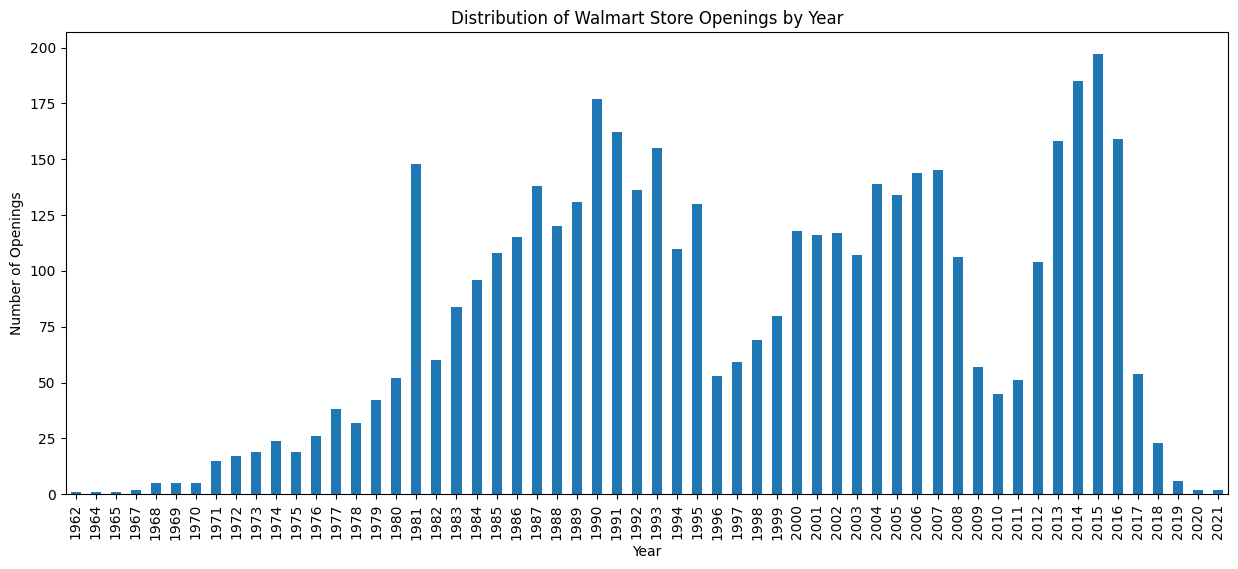

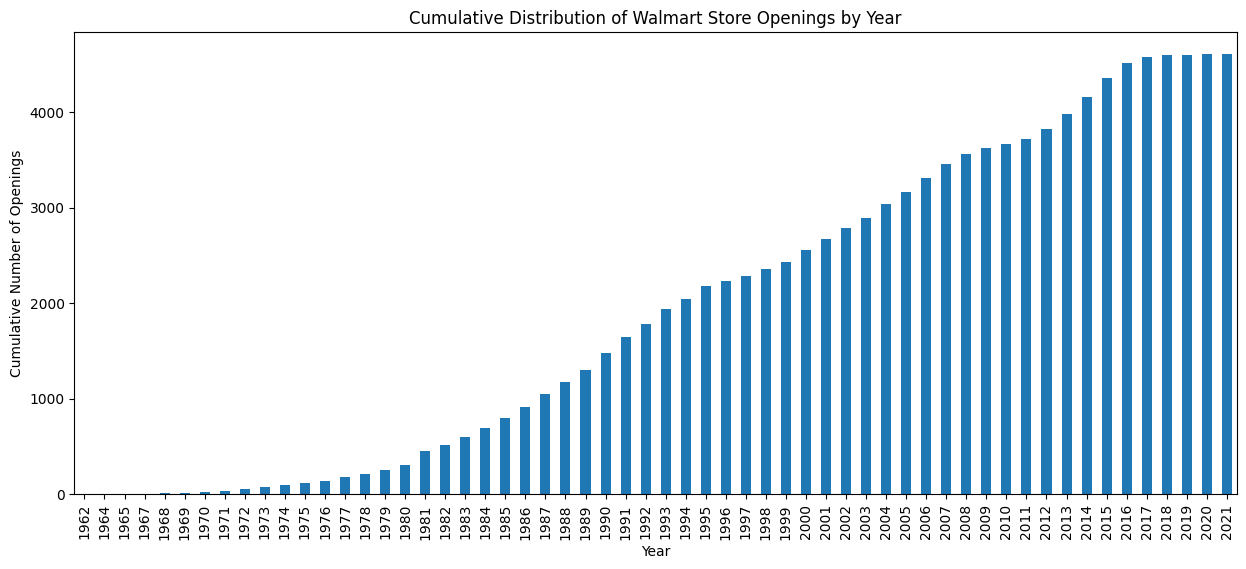

In [34]:
# Plotting the distribution of Walmart's open dates in separate plots for better readability

# Regular Distribution Plot
plt.figure(figsize=(15, 6))
open_date_distribution.plot(kind='bar')
plt.title('Distribution of Walmart Store Openings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Openings')
plt.show()

# Cumulative Sum Plot
plt.figure(figsize=(15, 6))
open_date_distribution.cumsum().plot(kind='bar')
plt.title('Cumulative Distribution of Walmart Store Openings by Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Openings')
plt.show()

/var/folders/_6/p9nq2tdd6418xp1vt5dxwqhm0000gn/T/ipykernel_12614/2022737652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zips_cleaned['median_household_income'] = zips_cleaned['median_household_income'].str.replace('[\$,]', '', regex=True).astype(float)


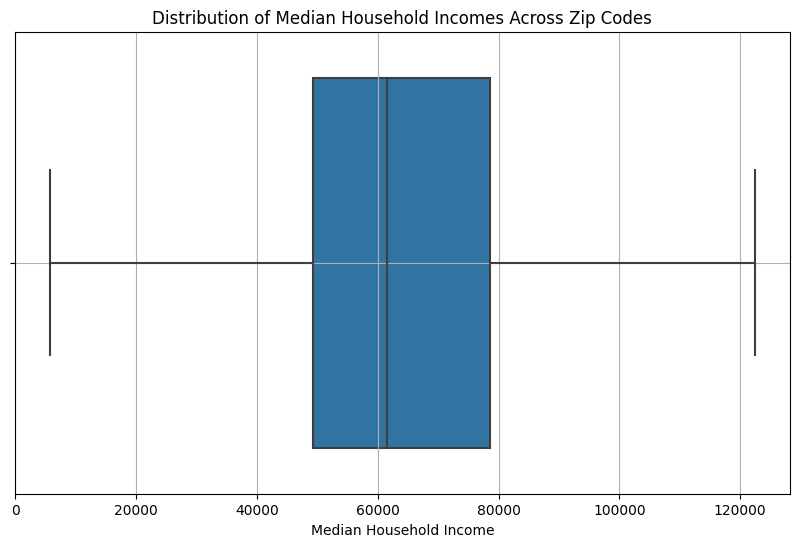

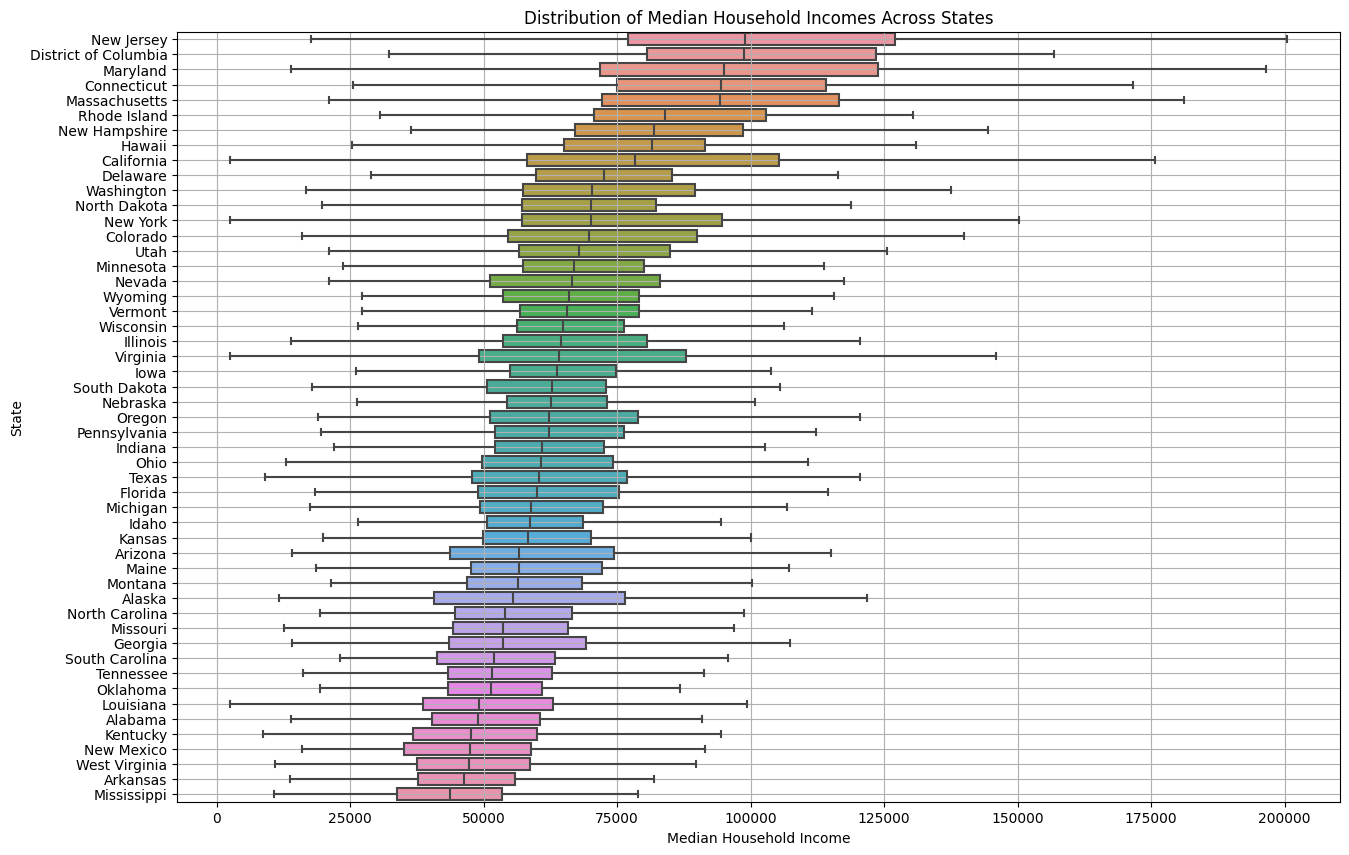

In [36]:
# Drop rows with NaN values in 'median_household_income' and 'population'
zips_cleaned = zips.dropna(subset=['median_household_income', 'population'])

# Convert 'median_household_income' to a numeric value
zips_cleaned['median_household_income'] = zips_cleaned['median_household_income'].str.replace('[\$,]', '', regex=True).astype(float)

# Box plot of all median household incomes
plt.figure(figsize=(10, 6))
sns.boxplot(x=zips_cleaned['median_household_income'], showfliers=False)
plt.title('Distribution of Median Household Incomes Across Zip Codes')
plt.xlabel('Median Household Income')
plt.grid(True)
plt.show()

# Box plot of median household incomes for each state, excluding outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=zips_cleaned, x='median_household_income', y='state_name', showfliers=False,
            order=zips_cleaned.groupby('state_name')['median_household_income'].median().sort_values(ascending=False).index)
plt.title('Distribution of Median Household Incomes Across States')
plt.xlabel('Median Household Income')
plt.ylabel('State')
plt.grid(True)
plt.show()

In [38]:
# Calculating the population distribution by rural, suburban, and urban classifications at the national level
national_ruca_distribution = zips_cleaned.groupby('ruca')['population'].sum()

# Calculating the population distribution by state and by rural, suburban, and urban classifications
state_ruca_distribution = zips_cleaned.groupby(['state_name', 'ruca'])['population'].sum()

national_ruca_distribution, state_ruca_distribution.head(18)  

(ruca
 Rural         8908314
 Suburban     56038213
 Urban       263524755
 Name: population, dtype: int64,
 state_name  ruca    
 Alabama     Rural         176490
             Suburban     1681060
             Urban        3112123
 Alaska      Rural         112317
             Suburban      268875
             Urban         350603
 Arizona     Rural         106989
             Suburban     1003951
             Urban        5954431
 Arkansas    Rural         159665
             Suburban      955901
             Urban        1873148
 California  Rural         280179
             Suburban     3249670
             Urban       35796238
 Colorado    Rural         161891
             Suburban      657475
             Urban        4880496
 Name: population, dtype: int64)

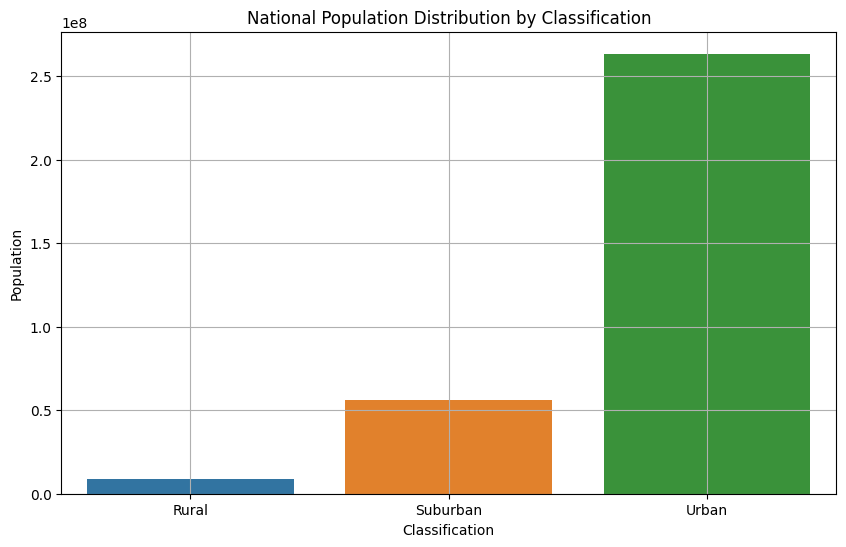

In [41]:
# Plotting National Level Distribution as a Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=national_ruca_distribution.index, y=national_ruca_distribution.values)
plt.title('National Population Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Population')
plt.grid(True)
plt.show()

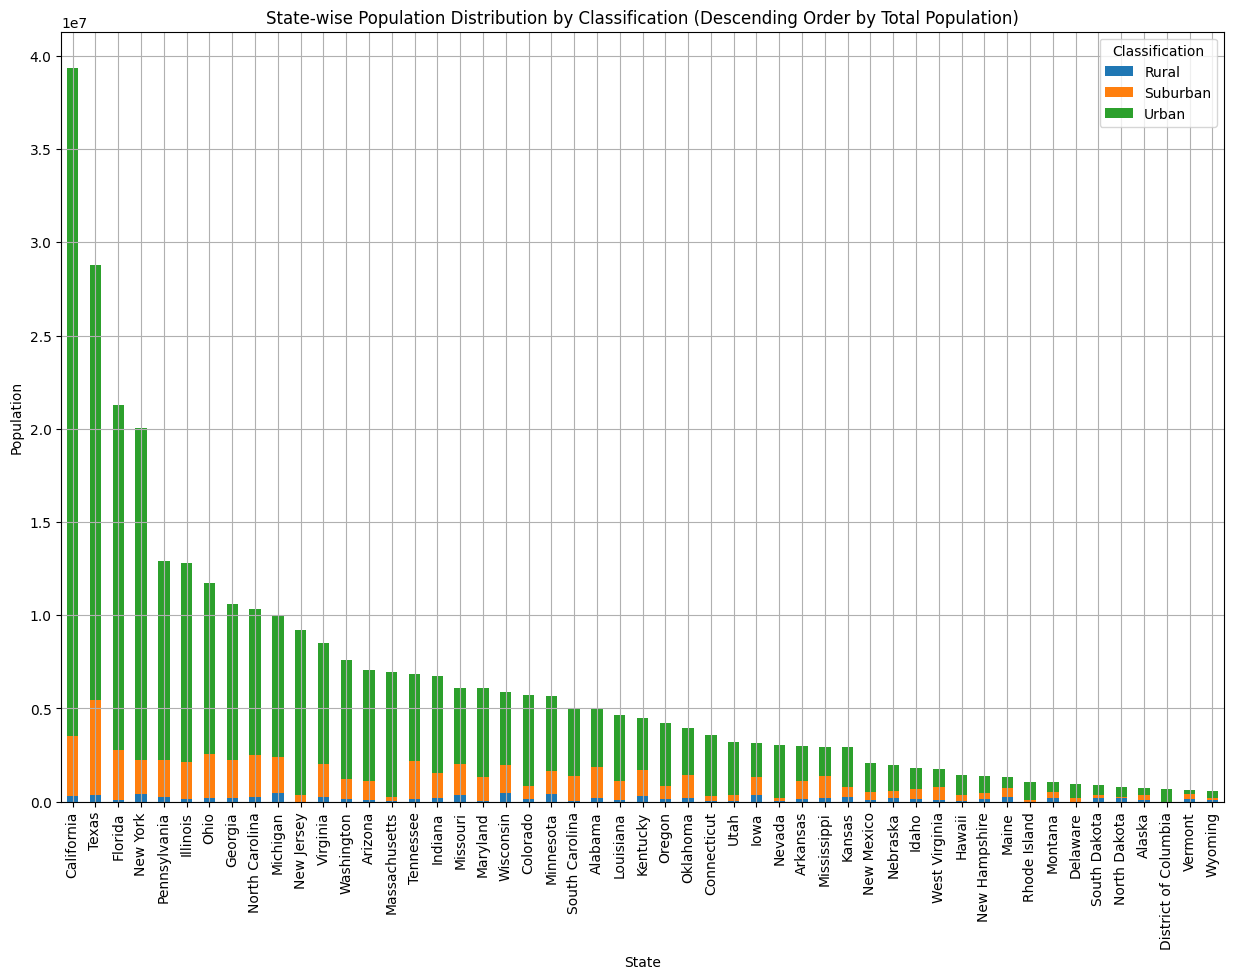

In [40]:
state_ruca_distribution_unstacked = state_ruca_distribution.unstack().fillna(0)

# Sorting the state-wise distribution by total population in descending order
state_ruca_distribution_sorted = state_ruca_distribution_unstacked.sum(axis=1).sort_values(ascending=False).index

# Replotting State Level Distribution as a Stacked Bar Chart in descending order of total population
state_ruca_distribution_unstacked.loc[state_ruca_distribution_sorted].plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('State-wise Population Distribution by Classification (Descending Order by Total Population)')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend(title='Classification')
plt.grid(True)
plt.show()